In [111]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import statistics as sta

In [112]:
#read the data
movie = pd.read_csv("movies.csv")
movie.head()

,movie,openness,conscientiousness,extraversion,agreeableness,neuroticism
0,27 Dresses,-2.193452,1.187850,0.491867,1.228186,0.425176
1,50 First Dates,-0.662553,1.187850,-0.362843,1.610591,-0.578141
2,A Walk to Remember,-1.810727,1.187850,1.061674,2.247931,-0.427644
3,Avatar,-0.279828,0.191167,-0.718973,0.335910,-0.578141
4,Back To the Future,-0.279828,-0.606179,-0.718973,-0.301431,0.926835


In [113]:
#correlation analysis
movie.corr()

,openness,conscientiousness,extraversion,agreeableness,neuroticism
openness,1.000000,-0.624154,-0.562072,-0.532264,0.177756
conscientiousness,-0.624154,1.000000,0.498482,0.398567,-0.318760
extraversion,-0.562072,0.498482,1.000000,0.223290,-0.125655
agreeableness,-0.532264,0.398567,0.223290,1.000000,-0.058545
neuroticism,0.177756,-0.318760,-0.125655,-0.058545,1.000000


In [17]:
'''
#corrtest test make sure the correlation methon
import math
open_std = movie['openness'].std()
open_mean = movie['openness'].mean()
cons_std = movie['conscientiousness'].std()
cons_mean = movie['conscientiousness'].mean()

total = 0
length = len(movie)
for i in range(length):
    tem = (movie['openness'][i]-open_mean)*(movie['conscientiousness'][i]-cons_mean)
    total = total + tem

rr = total / (open_std*(length**0.5)*cons_std*(length**0.5))
'''

"\n#corrtest test\nimport math\nopen_std = movie['openness'].std()\nopen_mean = movie['openness'].mean()\ncons_std = movie['conscientiousness'].std()\ncons_mean = movie['conscientiousness'].mean()\n\ntotal = 0\nlength = len(movie)\nfor i in range(length):\n    tem = (movie['openness'][i]-open_mean)*(movie['conscientiousness'][i]-cons_mean)\n    total = total + tem\n\nrr = total / (open_std*(length**0.5)*cons_std*(length**0.5))\n"

In [114]:
#Feature added by the result of correlation
Feature = pd.DataFrame()
Feature['conExt'] = movie['conscientiousness'] + movie['extraversion']
Feature['neuOpe'] = movie['neuroticism'] + movie['openness']

# K-Mean

In [115]:
# set cluster number(手動)
cluster_number = 24    

In [116]:

k_number = cluster_number +1
length = len(movie)
scatter = []
SSE = []

X = Feature[['conExt','neuOpe']].values
for k in range(1,k_number):
    #計算分K群的K-Mean
    km = KMeans(n_clusters=k)
    y_pred = km.fit_predict(X)
    Feature['predic'] = y_pred
    
    #取中心點
    center = km.cluster_centers_
    
    
    if k == 2:
        center_k = center
        lebel_k = y_pred
        #print(center_k)
    #取 SSE
    SSE.append(km.inertia_)  

    #以下計算各群離散度(沒有用到)
    #p 表示第幾群
    dis_std=[]
    for p in range(k):
        distpf = Feature[Feature['predic']==p]
        distpf = distpf.reset_index(drop=True)  
        dis_length = len(distpf)
        dis_list = []
        for g in range(dis_length):
            dist = ((distpf['conExt'][g] - center[p,0])**2 + (distpf['neuOpe'][g] - center[p,1])**2)**0.5
            
            dis_list.append(dist)
        
        if len(dis_list)>1:
            dis_std.append(sta.variance(dis_list))
        else:
            dis_std.append(dist)
    scatter.append(sta.mean(dis_std))   

# SSE Function

In [119]:
X = Feature[['conExt','neuOpe']].values

#SSE Function
def compute_SSE(center, data, lebel):
    
    sum_distance = 0
    for k in range(len(center)):
        for i in range(len(data)):
            if lebel[i] == k:
                #print(lebel[i])
                dis = (data[i][0] - center[k][0])**2 + (data[i][1] - center[k][1])**2
                sum_distance = sum_distance + dis
                
    return sum_distance


print(SSE_fun(center_k, X, lebel_k), SSE[1])


37.2815632866 37.2815632866


# Silhouette Coefficient

# Silhouette Coefficient

In [105]:
def distance(x1,x2,y1,y2):
    return ((x1-y1)**2 + (x2-y2)**2)**0.5



#各群組平均距離
def did_distance(two_d_list):
    two_d_list = np.array(two_d_list)
    lebel_dic = {}
    count = {}
    p = 0
    #print(two_d_list)
    
    '''所有lebel算一遍'''
    for w in two_d_list[:,0]:
        
        '''如果標籤相同，距離相加，並計算相加次數'''
        if w in lebel_dic:
            lebel_dic[w] = lebel_dic[w] + two_d_list[p][1]
            count[w] = count[w] + 1
        else:
            lebel_dic[w] = two_d_list[p][1]
            count[w] = 1
        p += 1
    #return lebel_dic, count

    out_list =[] 
    
    '''對所有lebel算平均距離'''
    for q in lebel_dic.keys():
        out_list.append(lebel_dic[q]/count[q])
    #print(out_list)
    return out_list




#============================================
#設 k
k_clust= 10

a_value = list()
b_value = list()

'''Run K 個迴圈'''
for k in range(1,k_clust):
    #計算分K群的K-Mean
    km = KMeans(n_clusters=k)
    
    Feature['predic'] = y_pred
 

    total_a=[]
    total_b=[]
    '''每種K下，所有資料run一次'''
    for i in range(length):
        a_list=[]
        b_list=[]
        b_k_list=[]
        
        '''以i點為目標點(Object)，所有資料Run一次'''
        for j in range(length):
            if i==j: #如果是同一個點，跳過
                continue
            else: # if i and j is not same point， Run
                
                #confirm it is same cluster of not
                if Feature['predic'][i]==Feature['predic'][j]: #if i and j is same cluster
                    #算距離，存進 a_list
                    a_list.append(distance(Feature['conExt'][j], Feature['neuOpe'][j], Feature['conExt'][i],Feature['neuOpe'][i]))
                    
                else: # if i and j is [not] same cluster
                    #算距離，並存進 b_k_list(含相對lebel)。   準備做進一步處理(算各群與i的平均，並挑最小的)
                    dd = distance(Feature['conExt'][j], Feature['neuOpe'][j], Feature['conExt'][i],Feature['neuOpe'][i])
                    b_k_list.append([Feature['predic'][j], dd])   #                                            
                                                
        #處理b_k_list
        if len(b_k_list) != 0:
            '''丟進function(did_distance)算各群平均距離'''
            b_list = did_distance(b_k_list)
        else:
            b_list.append(0)
            
        #挑最小的進total_b
        if len(b_list)==0:
            total_b.append(0)
        else:
            total_b.append(min(b_list))
                     


        # mean of each i
        if len(a_list)==0:
            total_a.append(0)
        elif len(a_list)==1:
            total_a.append(a_list[0])
        else:
            total_a.append(sta.mean(a_list))

                
                
    if len(total_a)==0:
        continue
        a_value.append(0)
    elif len(total_a)==1:
        a_value.append(total_a[0])
    else:
        a_value.append(sta.mean(total_a))
        

    
    if len(total_b)==0:
        continue
        #b_value.append(0)
    elif len(total_b)==1:
        b_value.append(total_b[0])
    else:
        b_value.append(sta.mean(total_b))
    

            

silhouette=[]
for z in range(len(a_value)):
    sil = (b_value[z]-a_value[z]) / max(a_value[z], b_value[z])
    silhouette.append(sil)
print('k = 2, silhouette= ',silhouette[1])

k = 2, silhouette=  0.524930937931


C:\Users\Eric\Anaconda3\envs\DataSC\lib\site-packages\matplotlib\axes\_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


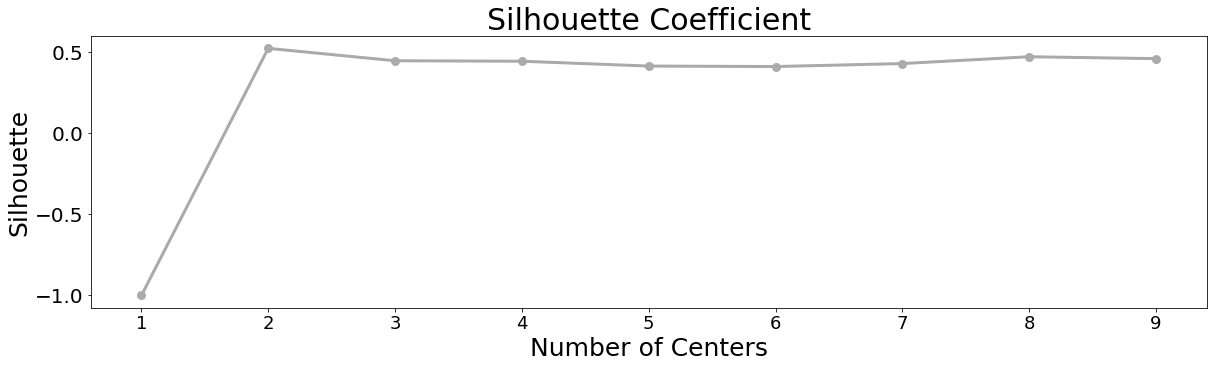

In [106]:
plt.style.use('seaborn-bright')

fig = plt.figure(figsize=(20,5))


#設置x軸
xx=[g for g in range(1,k_clust)]
ax = fig.add_subplot(111) #frameon= Tures
ax.set_xticks(xx)

'''
for k_x in range(1,25):
    num = str(k_x)
    k_trick.append('k='+num)
ax.set_xticklabels(k_trick)
'''
plt.rc('xtick', labelsize=18)
plt.rc('ytick', labelsize=20)

#主畫圖區
plt.plot(xx, silhouette, c='#AAAAAA',lw=3)
plt.plot(xx, silhouette, c='#AAAAAA', marker='.', mew='6')

#Label
plt.title('Silhouette Coefficient', fontsize=30)    
plt.xlabel('Number of Centers', fontsize=25)
plt.ylabel('Silhouette', fontsize=25)
plt.legend()


plt.show()

# Plot(Sum of squared errors)

C:\Users\Eric\Anaconda3\envs\DataSC\lib\site-packages\matplotlib\axes\_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


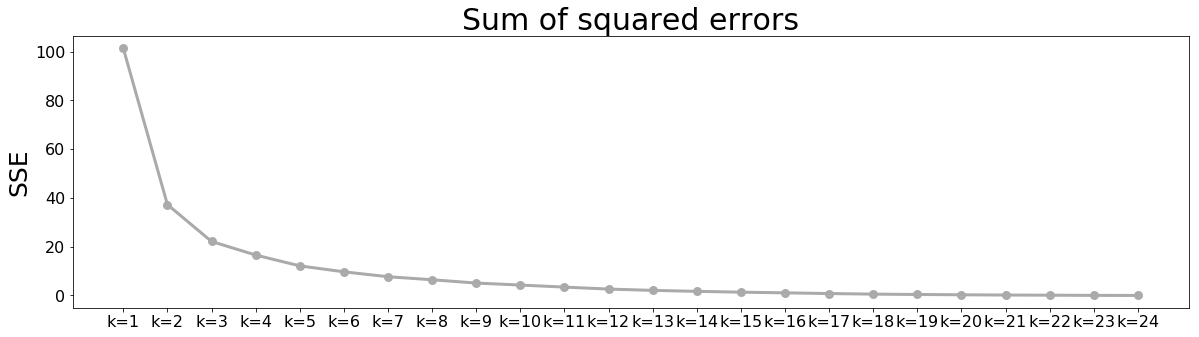

In [66]:
plt.style.use('seaborn-bright')

fig = plt.figure(figsize=(20,5))
#生成一个坐标框，对应一个图形对象，不显示坐标轴，但刻度仍在


#設置x軸
xx=[g for g in range(1,k_number)]
ax = fig.add_subplot(111) #frameon= Tures
ax.set_xticks(xx)
for k_x in range(1,k_number):
    num = str(k_x)
    k_trick.append('k='+num)
ax.set_xticklabels(k_trick)    
plt.rc('xtick', labelsize=18)
plt.rc('ytick', labelsize=20)

#主畫圖區
plt.plot(xx, SSE, c='#AAAAAA',lw=3)
plt.plot(xx, SSE, c='#AAAAAA', marker='.', mew='6')

#Label
plt.title('Sum of squared errors', fontsize=30)    
#plt.xlabel('Number of k', fontsize=25)
plt.ylabel('SSE', fontsize=25)
plt.legend()


plt.show()

# silhouette coefficient

In [96]:
# set cluster number for silhuette(手動)
cluster_number_silhouette_coe = 10   

In [107]:
from sklearn.metrics import silhouette_samples, silhouette_score
k_number_silh = cluster_number_silhouette_coe+1


silhouette_avg=[]
silhouette_avg.append(-1)  
#k=1時,silhouette coefficient = -1 (但是為了圖好看，設定為0，後續用繪圖軟體修掉點位)

for k in range(2,k_number_silh):
    #計算分K群的K-Mean
    km = KMeans(n_clusters=k)
    y_pred = km.fit_predict(X)
    Feature['predic'] = y_pred

    silhouette_avg.append(silhouette_score(X, y_pred))
silhouette_avg[1]

0.48910460343991685

C:\Users\Eric\Anaconda3\envs\DataSC\lib\site-packages\matplotlib\axes\_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


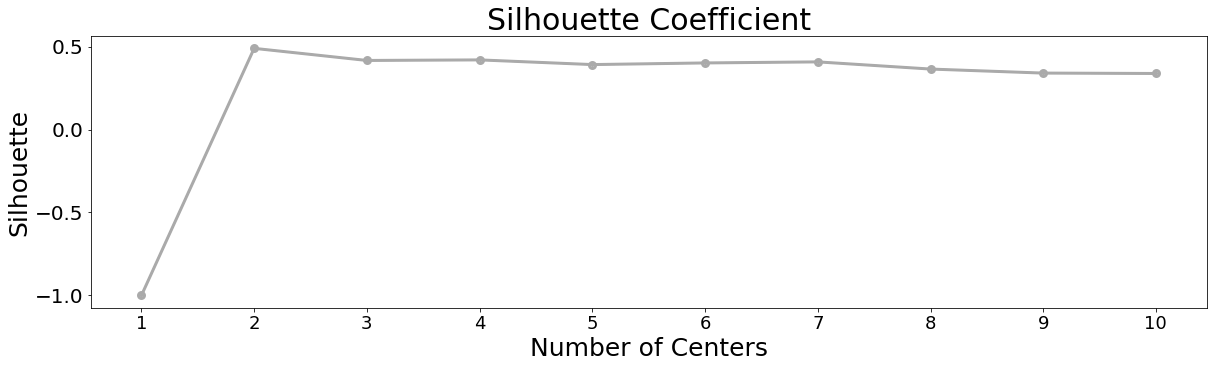

In [109]:
plt.style.use('seaborn-bright')

fig = plt.figure(figsize=(20,5))


#設置x軸
xx=[g for g in range(1,k_number_silh)]
ax = fig.add_subplot(111) #frameon= Tures
ax.set_xticks(xx)

'''
for k_x in range(1,25):
    num = str(k_x)
    k_trick.append('k='+num)
ax.set_xticklabels(k_trick)
'''
plt.rc('xtick', labelsize=18)
plt.rc('ytick', labelsize=20)

#主畫圖區
plt.plot(xx, silhouette_avg, c='#AAAAAA',lw=3)
plt.plot(xx, silhouette_avg, c='#AAAAAA', marker='.', mew='6')

#Label
plt.title('Silhouette Coefficient', fontsize=30)    
plt.xlabel('Number of Centers', fontsize=25)
plt.ylabel('Silhouette', fontsize=25)
plt.legend()


plt.show()

# scatter

In [ ]:
plt.style.use('seaborn-bright')

fig = plt.figure(figsize=(20,5))

#設置x軸
xx=[g for g in range(1,k_number)]
ax = fig.add_subplot(111) #frameon= Tures
ax.set_xticks(xx)

k_trick = []
for k_x in range(1,k_number):
    num = str(k_x)
    k_trick.append('k='+num)
ax.set_xticklabels(k_trick)
    
plt.rc('xtick', labelsize=16)
plt.rc('ytick', labelsize=16)

#主畫圖區
plt.plot(xx, scatter, c='#AAAAAA',lw=3)
plt.plot(xx, scatter, c='#AAAAAA', marker='.', mew='6')

#Label
plt.title('Within-cluster scatter decreases', fontsize=30)    
#plt.xlabel('Number of k', fontsize=25)
plt.ylabel('Variations', fontsize=25)
plt.legend()


plt.show()

# Center Iteration

In [70]:
#設定初始點
init_list = [3,2,5,-1]

#設定迭代數
Iteration_Times = 4

In [71]:
cen_list = []
init_cen=np.array([3,2,5,-1]).reshape(2,2)
ite = Iteration_Times + 1

for i in range(1,ite):
    km_ieta = KMeans(n_clusters=2, max_iter=i ,init=init_cen)
    pred = km_ieta.fit_predict(X)
    #取中心
    center = km_ieta.cluster_centers_
    cen_list.append(center)
    print(center)


[[-0.16416433  0.12443688]
 [ 2.19610469 -1.69855344]]
[[-0.58544949  0.35559133]
 [ 1.91120113 -1.27826149]]
[[-1.0743173   0.62094506]
 [ 1.60859106 -1.02111043]]
[[-1.13768639  0.80797539]
 [ 1.46070803 -1.06744184]]


C:\Users\Eric\Anaconda3\envs\DataSC\lib\site-packages\sklearn\cluster\k_means_.py:893: RuntimeWarning: Explicit initial center position passed: performing only one init in k-means instead of n_init=10
  return_n_iter=True)


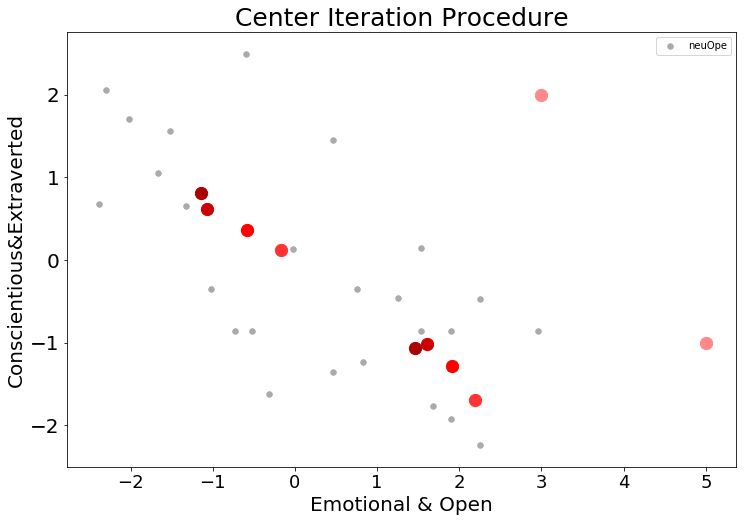

In [73]:
fig = plt.figure(figsize=(12,8))

# 畫初始點
plt.scatter(init_list[0],init_list[1], marker='o', c='#FF8888',s=150)
plt.scatter(init_list[2],init_list[3], marker='o', c='#FF8888',s=150)


# 第一次迭代
plt.scatter(cen_list[0][0][0],  cen_list[0][0][1], marker='o', c='#FF3333',s=150)
plt.scatter(cen_list[0][1][0],  cen_list[0][1][1], marker='o', c='#FF3333',s=150)

plt.scatter(cen_list[1][0][0],  cen_list[1][0][1], marker='o', c='#FF0000',s=150)
plt.scatter(cen_list[1][1][0],  cen_list[1][1][1], marker='o', c='#FF0000',s=150)


plt.scatter(cen_list[2][0][0], cen_list[2][0][1], marker='o', c='#CC0000',s=150)
plt.scatter(cen_list[2][1][0], cen_list[2][1][1], marker='o', c='#CC0000',s=150)


plt.scatter(cen_list[3][0][0], cen_list[3][0][1], marker='o', c='#AA0000',s=150)
plt.scatter(cen_list[3][1][0], cen_list[3][1][1], marker='o', c='#AA0000',s=150)

plt.scatter(Feature['conExt'],Feature['neuOpe'],c='#AAAAAA',marker='o',s=30)


#Label
plt.title('Center Iteration Procedure', fontsize=25)    
plt.xlabel('Emotional & Open', fontsize=20)
plt.ylabel('Conscientious&Extraverted', fontsize=20)
plt.legend()




plt.show()

In [74]:
print(plt.style.available)

['bmh', 'classic', 'dark_background', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark-palette', 'seaborn-dark', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'seaborn', '_classic_test']


In [ ]:
'''
K-Mean Parameter：

1.
init : {‘k-means++’, ‘random’ or an ndarray}
If an ndarray is passed, it should be of shape (n_clusters, n_features) and gives the initial centers

2.
n_init : int, default: 10
Number of time the k-means algorithm will be run with different centroid seeds. 
The final results will be the best output of n_init consecutive runs in terms of inertia.

3.
max_iter : int, default: 300
Maximum number of iterations of the k-means algorithm for a single run.

4.
algorithm : “auto”, “full” or “elkan”, default=”auto”
K-means algorithm to use. The classical EM-style algorithm is “full”. 
The “elkan” variation is more efficient by using the triangle inequality, but currently doesn’t support sparse data. 
“auto” chooses “elkan” for dense data and “full” for sparse data

'''
'''
cluster_centers_ : array, [n_clusters, n_features]
Coordinates of cluster centers


labels_ : :
Labels of each point


inertia_ : float
Sum of distances of samples to their closest cluster center.
'''

In [1]:
import matplotlib.pyplot as plt
fig = plt.figure()
plt.show()